In [4]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances.csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [5]:
# Your code to import all the relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Read and display dataset.

In [6]:
# Your code to read data
file_path = "student_performances.csv"
dataset = pd.read_csv(file_path)
# Your code to print first few samples of the dataset.
print("First few samples of the dataset:")
print(dataset.head())

First few samples of the dataset:
  sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0   F   18       U     GT3       A     4     4  at_home   teacher  course   
1   F   17       U     GT3       T     1     1  at_home     other  course   
2   F   15       U     LE3       T     1     1  at_home     other   other   
3   F   15       U     GT3       T     4     2   health  services    home   
4   F   16       U     GT3       T     3     3    other     other    home   

   ... internet  romantic  famrel  freetime goout Dalc Walc health absences  \
0  ...       no        no       4         3     4    1    1      3        6   
1  ...      yes        no       5         3     3    1    1      3        4   
2  ...      yes        no       4         3     2    2    3      3       10   
3  ...      yes       yes       3         2     2    1    1      5        2   
4  ...       no        no       4         3     2    1    2      5        4   

         grades  
0         

# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [7]:
# Your code to print the key information about the datset. Use - .info method.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

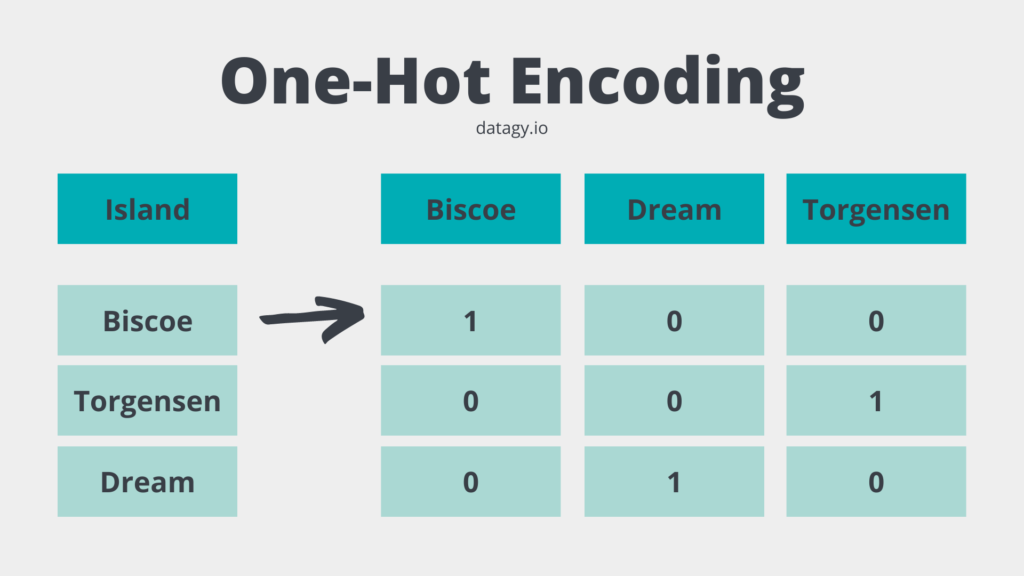

In [8]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [9]:
# Your code to print first few rows of the data.
data.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


# Converting other text values in the dataframe to numbers using label encoding.

In [10]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])

#
## Your code to convert transform famsize to the numbers
#
labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])

#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])

#
## Your code to convert transform schoolsup to the numbers
#
labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])

#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])
#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])

#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])

#
## Your code to convert transform nursery to the numbers
#
labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])

#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])

#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])
#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])

In [11]:
# Convert object data types to numerical values using Label Encoding
label_encoder = LabelEncoder()

# Iterate through columns and apply label encoding for object data types
for column in data.columns:
    if data[column].dtype == 'object' and column != 'grades':
        #labelencoder.fit(data[column])
        data[column] = label_encoder.fit_transform(data[column])

# Print updated information about the dataset
print("\nUpdated information after label encoding:")
print(data.info())


Updated information after label encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  i

# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [12]:
# Your code to print first few samples of the data.
data.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
5,1,16,1,1,1,4,3,1,2,0,...,0,1,0,0,0,0,1,0,1,0
6,1,16,1,1,1,2,2,1,2,0,...,1,0,0,0,1,0,0,0,1,0
7,0,17,1,0,0,4,4,2,2,0,...,1,0,0,0,1,0,0,0,1,0
8,1,15,1,1,0,3,2,1,2,0,...,0,1,0,0,1,0,0,0,1,0
9,1,15,1,0,1,3,4,1,2,0,...,1,0,0,0,1,0,0,0,1,0


In [13]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [14]:
# Your code to get X from data
X = data.drop('grades', axis=1)

# Your code to get y from data
y = data['grades']

# Print shapes of X and y to make sure everything is good

In [15]:
# Print shape of X
print("Shape of X:", X.shape)
# Print shape of y
print("Shape of y:", y.shape)
# Print X
print("X:")
print(X)
# Print y
print("y:")
print(y)

Shape of X: (395, 42)
Shape of y: (395,)
X:
     sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0      0   18        1        0        0     4     4           2          2   
1      0   17        1        0        1     1     1           1          2   
2      0   15        1        1        1     1     1           1          2   
3      0   15        1        0        1     4     2           1          3   
4      0   16        1        0        1     3     3           1          2   
..   ...  ...      ...      ...      ...   ...   ...         ...        ...   
390    1   20        1        1        0     2     2           1          2   
391    1   17        1        1        1     3     1           2          1   
392    1   21        0        0        1     1     1           1          1   
393    1   18        0        1        1     3     2           3          1   
394    1   19        1        1        1     1     1           1          1   

     fa

# Next  - Split data into train and test set.

In [16]:
# Your code to split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Print shapes of train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (316, 42)
Shape of X_test: (79, 42)
Shape of y_train: (316,)
Shape of y_test: (79,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [17]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [18]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.3037974683544304
None
Precision test set:  0.3037974683544304
None
Recall test set:  0.3037974683544304
None
F-score test set:  0.3037974683544304
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00         6
        good       0.00      0.00      0.00        12
        poor       0.30      1.00      0.47        24
satisfactory       0.00      0.00      0.00        30
   very good       0.00      0.00      0.00         7

    accuracy                           0.30        79
   macro avg       0.06      0.20      0.09        79
weighted avg       0.09      0.30      0.14        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [19]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.33544303797468356
None
Precision train set:  0.33544303797468356
None
Recall train set:  0.33544303797468356
None
F-score train set:  0.33544303797468356
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        34
        good       0.00      0.00      0.00        50
        poor       0.34      1.00      0.50       106
satisfactory       0.00      0.00      0.00        73
   very good       0.00      0.00      0.00        53

    accuracy                           0.34       316
   macro avg       0.07      0.20      0.10       316
weighted avg       0.11      0.34      0.17       316



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

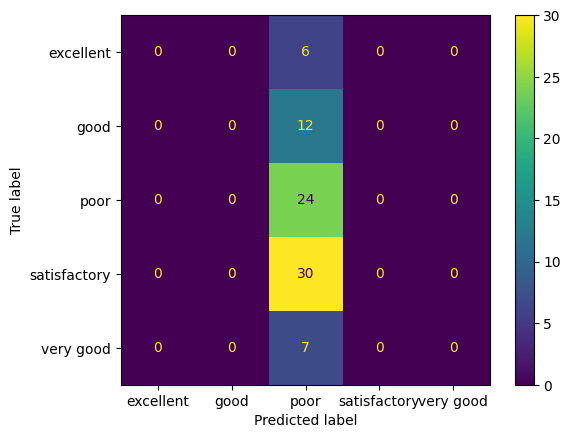

In [20]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

Accuracy for linear kernel: 0.27848101265822783
Accuracy for poly kernel: 0.3037974683544304
Accuracy for rbf kernel: 0.3037974683544304
Accuracy for sigmoid kernel: 0.27848101265822783


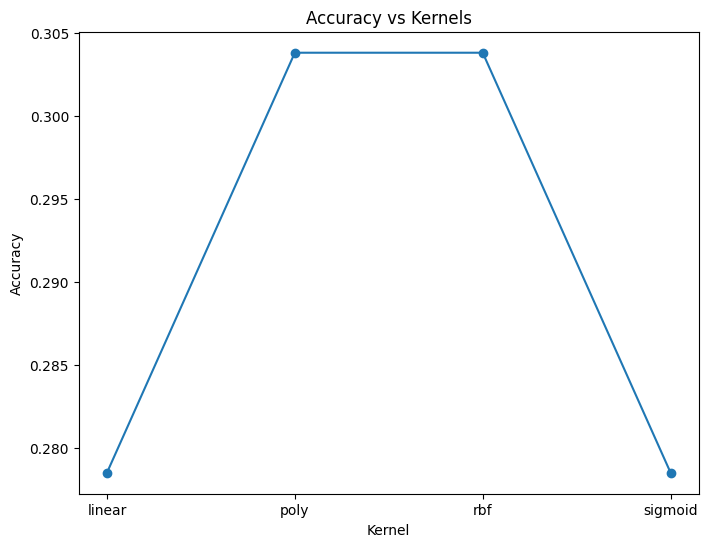

In [21]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid']
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an empty list accuracy
accuracy_list = []

for kernel in kernels:
    # Your code to compare the classifier for different Kernels
    classifier = SVC(kernel=kernel)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate accuracy for the current kernel
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Optionally, print accuracy for each kernel
    print(f"Accuracy for {kernel} kernel: {accuracy}")

# Your code to plot accuracy vs kernels
plt.figure(figsize=(8, 6))
plt.plot(kernels, accuracy_list, marker='o')
plt.title('Accuracy vs Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [22]:
# Develop KNN-based classifier. Use number of neigbours of your choice

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [23]:
# Your code to evaluate the classifer on test data

# Evaluate KNN performance
print("KNN Classifier Performance on Test Data:")
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='micro')
knn_recall = recall_score(y_test, knn_predictions, average='micro')
knn_f1_score = f1_score(y_test, knn_predictions, average='micro')

print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F-score:", knn_f1_score)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))

KNN Classifier Performance on Test Data:
Accuracy: 0.3291139240506329
Precision: 0.3291139240506329
Recall: 0.3291139240506329
F-score: 0.3291139240506329

Classification Report:
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00         6
        good       0.11      0.08      0.10        12
        poor       0.41      0.62      0.49        24
satisfactory       0.45      0.30      0.36        30
   very good       0.14      0.14      0.14         7

    accuracy                           0.33        79
   macro avg       0.22      0.23      0.22        79
weighted avg       0.32      0.33      0.31        79



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [24]:
# Your code to evaluate the classifer on train data

# Evaluate KNN performance on training data
print("KNN Classifier Performance on Training Data:")
train_data_predictions_knn = knn_classifier.predict(X_train)

# Accuracy, Precision, Recall, F-score on training data
knn_accuracy_train = accuracy_score(y_train, train_data_predictions_knn)
knn_precision_train = precision_score(y_train, train_data_predictions_knn, average='micro')
knn_recall_train = recall_score(y_train, train_data_predictions_knn, average='micro')
knn_f1_score_train = f1_score(y_train, train_data_predictions_knn, average='micro')

print("Accuracy (Training):", knn_accuracy_train)
print("Precision (Training):", knn_precision_train)
print("Recall (Training):", knn_recall_train)
print("F-score (Training):", knn_f1_score_train)

# Classification Report on training data
print("\nClassification Report (Training):")
print(classification_report(y_train, train_data_predictions_knn))

KNN Classifier Performance on Training Data:
Accuracy (Training): 0.5506329113924051
Precision (Training): 0.5506329113924051
Recall (Training): 0.5506329113924051
F-score (Training): 0.5506329113924051

Classification Report (Training):
              precision    recall  f1-score   support

   excellent       0.39      0.38      0.39        34
        good       0.47      0.44      0.45        50
        poor       0.65      0.74      0.69       106
satisfactory       0.58      0.56      0.57        73
   very good       0.44      0.38      0.41        53

    accuracy                           0.55       316
   macro avg       0.51      0.50      0.50       316
weighted avg       0.54      0.55      0.55       316



# Display confusion matric between predicted and actual values.

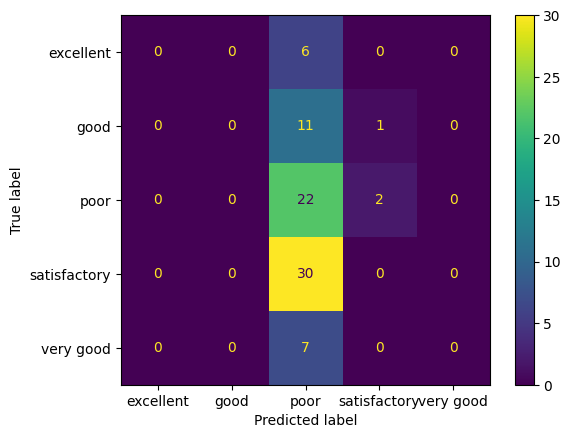

In [25]:
# Your code to display confusion matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1 , display_labels=knn_classifier.classes_)
disp.plot()

# Develop Logistic Regression-based classifier.

In [26]:
# Your code to develop logistic regression-based classifier

logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))


Logistic Regression Classifier Performance:
Accuracy: 0.35443037974683544
Classification Report:
               precision    recall  f1-score   support

   excellent       0.00      0.00      0.00         6
        good       0.00      0.00      0.00        12
        poor       0.44      0.71      0.54        24
satisfactory       0.59      0.33      0.43        30
   very good       0.08      0.14      0.11         7

    accuracy                           0.35        79
   macro avg       0.22      0.24      0.21        79
weighted avg       0.36      0.35      0.33        79



# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [27]:
# Your code to evaluate the logistic regression classifier on test data

print("Logistic Regression Classifier Performance on Test Data:")
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='micro')
logistic_recall = recall_score(y_test, logistic_predictions, average='micro')
logistic_f1_score = f1_score(y_test, logistic_predictions, average='micro')

print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F-score:", logistic_f1_score)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Classifier Performance on Test Data:
Accuracy: 0.35443037974683544
Precision: 0.35443037974683544
Recall: 0.35443037974683544
F-score: 0.35443037974683544

Classification Report:
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00         6
        good       0.00      0.00      0.00        12
        poor       0.44      0.71      0.54        24
satisfactory       0.59      0.33      0.43        30
   very good       0.08      0.14      0.11         7

    accuracy                           0.35        79
   macro avg       0.22      0.24      0.21        79
weighted avg       0.36      0.35      0.33        79



# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [28]:
# Your code to evaluate the logistic regression classifier on train data

print("Logistic Regression Classifier Performance on Training Data:")
train_data_predictions_logistic = logistic_classifier.predict(X_train)

# Accuracy, Precision, Recall, F-score on training data
logistic_accuracy_train = accuracy_score(y_train, train_data_predictions_logistic)
logistic_precision_train = precision_score(y_train, train_data_predictions_logistic, average='micro')
logistic_recall_train = recall_score(y_train, train_data_predictions_logistic, average='micro')
logistic_f1_score_train = f1_score(y_train, train_data_predictions_logistic, average='micro')

print("Accuracy (Training):", logistic_accuracy_train)
print("Precision (Training):", logistic_precision_train)
print("Recall (Training):", logistic_recall_train)
print("F-score (Training):", logistic_f1_score_train)

# Classification Report on training data
print("\nClassification Report (Training):")
print(classification_report(y_train, train_data_predictions_logistic))

Logistic Regression Classifier Performance on Training Data:
Accuracy (Training): 0.5443037974683544
Precision (Training): 0.5443037974683544
Recall (Training): 0.5443037974683544
F-score (Training): 0.5443037974683544

Classification Report (Training):
              precision    recall  f1-score   support

   excellent       0.64      0.47      0.54        34
        good       0.47      0.38      0.42        50
        poor       0.61      0.73      0.66       106
satisfactory       0.47      0.42      0.45        73
   very good       0.50      0.55      0.52        53

    accuracy                           0.54       316
   macro avg       0.54      0.51      0.52       316
weighted avg       0.54      0.54      0.54       316



# Display confusion matrix between predicted and actual values for logistic regression.

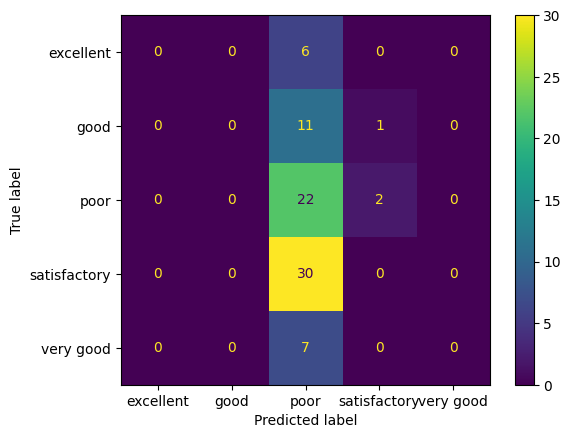

In [29]:
# Your code to display confusion matrix for logistic regression

confusion_matrix2 = confusion_matrix(y_test, y_pred, labels=logistic_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2 , display_labels=logistic_classifier.classes_)
disp.plot()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

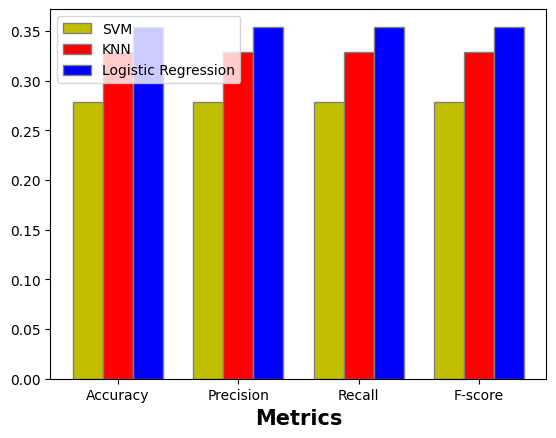

In [34]:
# Metrics and scores for different classifiers
metrics = ['Accuracy', 'Precision', 'Recall', 'F-score']
svm_scores = [accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred, average='micro'),
              recall_score(y_test, y_pred, average='micro'),
              f1_score(y_test, y_pred, average='micro')]

knn_scores = [accuracy_score(y_test, knn_predictions),
              precision_score(y_test, knn_predictions, average='micro'),
              recall_score(y_test, knn_predictions, average='micro'),
              f1_score(y_test, knn_predictions, average='micro')]

logistic_scores = [accuracy_score(y_test, logistic_predictions),
                   precision_score(y_test, logistic_predictions, average='micro'),
                   recall_score(y_test, logistic_predictions, average='micro'),
                   f1_score(y_test, logistic_predictions, average='micro')]

# Creating grouped bar plot
bar_width = 0.25
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, svm_scores, color='y', width=bar_width, edgecolor='grey', label='SVM')
plt.bar(r2, knn_scores, color='r', width=bar_width, edgecolor='grey', label='KNN')
plt.bar(r3, logistic_scores, color='b', width=bar_width, edgecolor='grey', label='Logistic Regression')

# Adding labels and legend
plt.xlabel('Metrics', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(metrics))], metrics)
plt.legend()

# Show the plot
plt.show()

Best Performing Algorithm: Logistic Regression


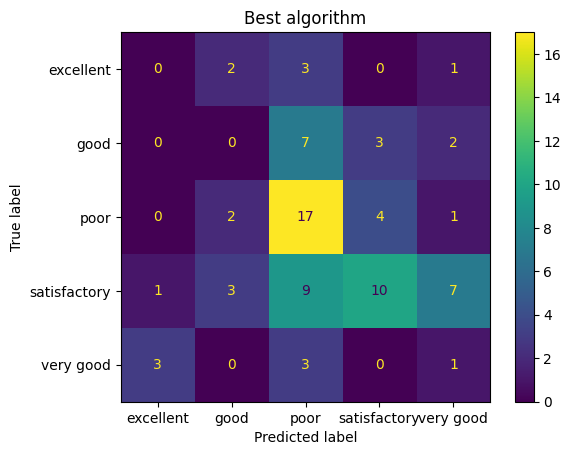

 Best Performance: satisfactory
 Least Performance: excellent


In [35]:
# Define classifiers and their predictions
classifiers = {
    'SVM': (classifier, y_pred),
    'KNN': (knn_classifier, knn_predictions),
    'Logistic Regression': (logistic_classifier, logistic_predictions)
}

# Find the best-performing algorithm based on accuracy
best_algorithm, (best_classifier, best_predictions) = max(classifiers.items(), key=lambda item: accuracy_score(y_test, item[1][1]))

print(f"Best Performing Algorithm: {best_algorithm}")

# Display confusion matrix for the best-performing algorithm
best_conf_matrix = confusion_matrix(y_test, best_predictions, labels=best_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=best_classifier.classes_)
disp.plot()
plt.title("Best algorithm")
plt.show()

# Identify categories with best and least performance
best_performance_category = best_classifier.classes_[np.argmax(np.sum(best_conf_matrix, axis=1))]
least_performance_category = best_classifier.classes_[np.argmin(np.sum(best_conf_matrix, axis=1))]

print(f" Best Performance: {best_performance_category}")
print(f" Least Performance: {least_performance_category}")


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

